# Imports


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Dataset

**Dataset Name:** Air Quality and Pollution Assessment

**Description:** This dataset focuses on air quality assessment across various regions. The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels. All features have continuous values except target variable (Air Quality Levels), which has categorigal values. It's taken from Kaggle.

**Features:**

1. **Temperature (°C):** Average temperature of the region.
2. **Humidity (%):** Relative humidity recorded in the region.
3. **PM2.5 Concentration (µg/m³):** Fine particulate matter levels.
4. **PM10 Concentration (µg/m³):** Coarse particulate matter levels.
5. **NO2 Concentration (ppb):** Nitrogen dioxide levels.
6. **SO2 Concentration (ppb):** Sulfur dioxide levels.
7. **CO Concentration (ppm):** Carbon monoxide levels.
8. **Proximity to Industrial Areas (km):** Distance to the nearest industrial zone.
9. **Population Density (people/km²):** Number of people per square kilometer in the region.
10. **Air Quality Levels:** Good, Moderate, Poor, Hazardous.

**Source:** https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data

**Goal:** The goal is to develop a model that classifies air quality into four distinct categories: Good, Moderate, Poor, and Hazardous.


# Data Preparation

In [ ]:
# Load the dataset

df = pd.read_csv("/content/drive/MyDrive/AMIRL Task/pollution_dataset.csv")

In [ ]:
# Display dataset information and initial analysis

print("Dataset Information: \n")
df.head()

Dataset Information: 



,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
# Check dimensions of the dataset

df.shape

(5000, 10)

In [ ]:
# Check for missing values

df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
# Check for duplicate values

df.duplicated().sum()

0

In [ ]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


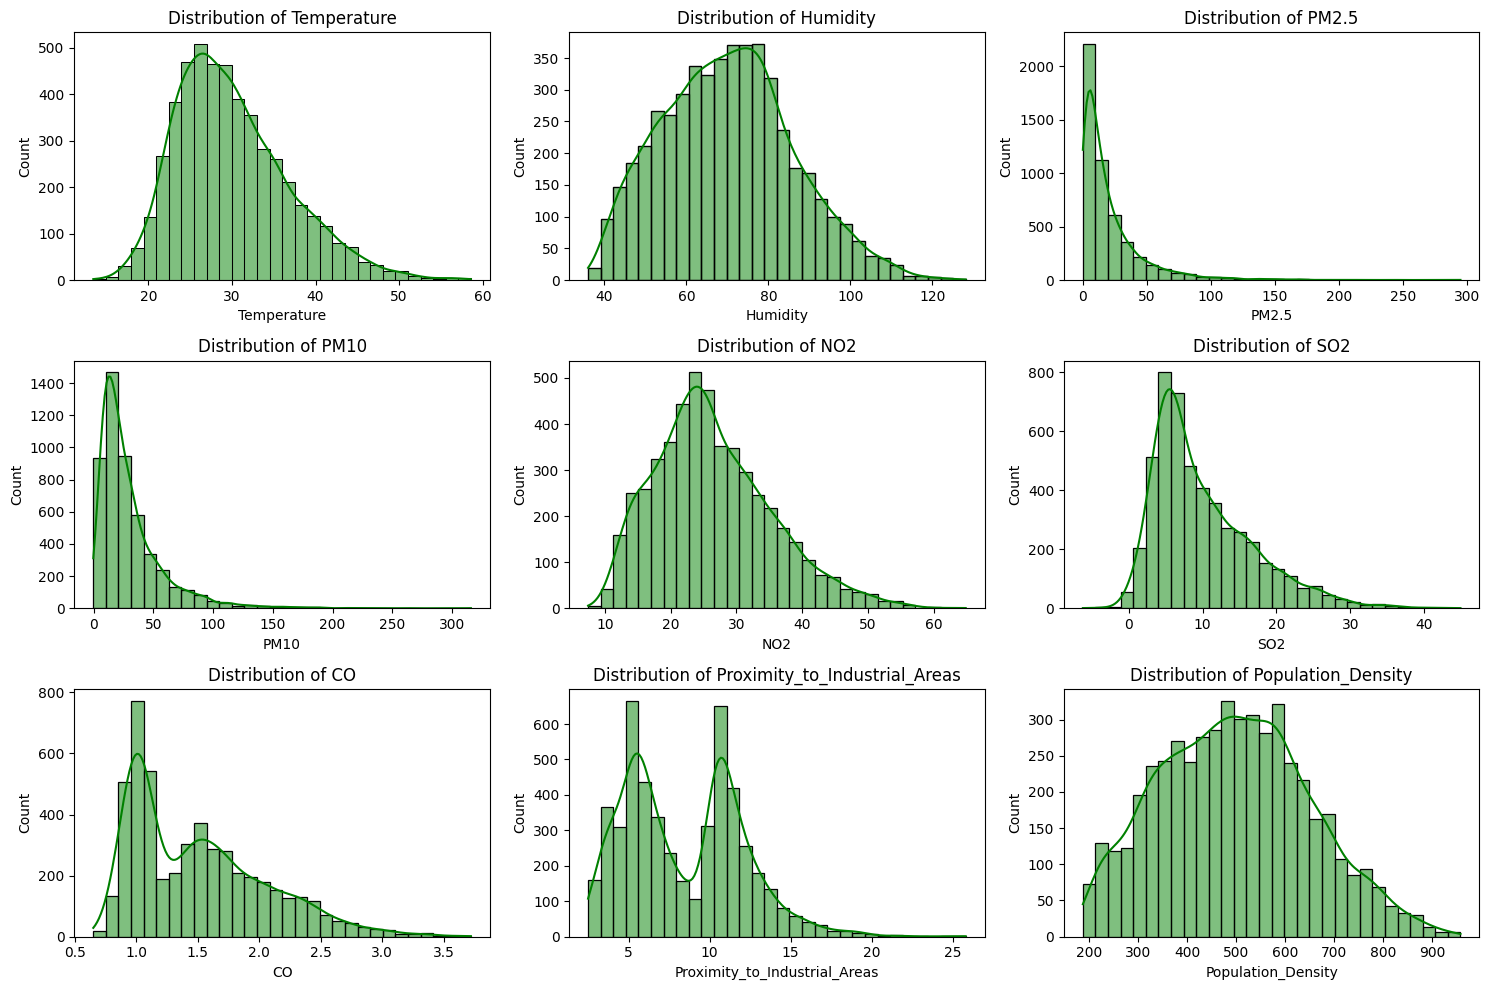

In [ ]:
# Data distribution of all the continuous features

# Drop the target variable 'Air Quality'
features = df.drop(columns=['Air Quality'])

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot the distribution for each feature
for i, column in enumerate(features.columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for 9 features
    sns.histplot(features[column], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

# Display all plots
plt.show()

**Distribution of Continuous features**

1. Temperature: The temperature distribution seems to follow a normal pattern but with a slight rightward skew. Extreme temperatures below 15°C and above 45°C are less frequent, which could suggest the presence of outliers or uncommon events.

2. Humidity: The majority of the recorded humidity levels are between 60% and 80%. Extremely high humidity values (over 100%) are relatively uncommon.

3. PM2.5: The distribution of PM2.5 is noticeably skewed, with a higher concentration of values in the lower range. Most PM2.5 measurements are under 50 micrograms/m³, implying that pollution levels are generally low.

3. PM10: Similar to PM2.5, the PM10 distribution is also right-skewed, suggesting a larger number of lower PM10 values and fewer higher ones.

4. NO2 (Nitrogen Dioxide): The distribution of NO2 levels is right-skewed, with most values falling between 10 and 40 micrograms/m³.

5. CO (Carbon Monoxide): The CO distribution shows a rightward skew, with most values clustering between 1.0 and 1.5. A smaller portion of the data reflects occasional higher values exceeding 2.5, indicating periodic increases in CO levels.

6. SO2 (Sulfur Dioxide): Like the other pollutants, SO2 follows a right-skewed distribution, with most values ranging from 5.0 to 13.0.

7. Proximity to Industrial Areas: This feature displays a bimodal distribution, indicating two prominent peaks. This suggests that there may be distinct regions either very close to or moderately distant from industrial areas.

8. Population Density: The population density distribution resembles a normal curve with slight skewness. The majority of the values lie between 400 and 600, indicating a typical population density range for most areas in the dataset.



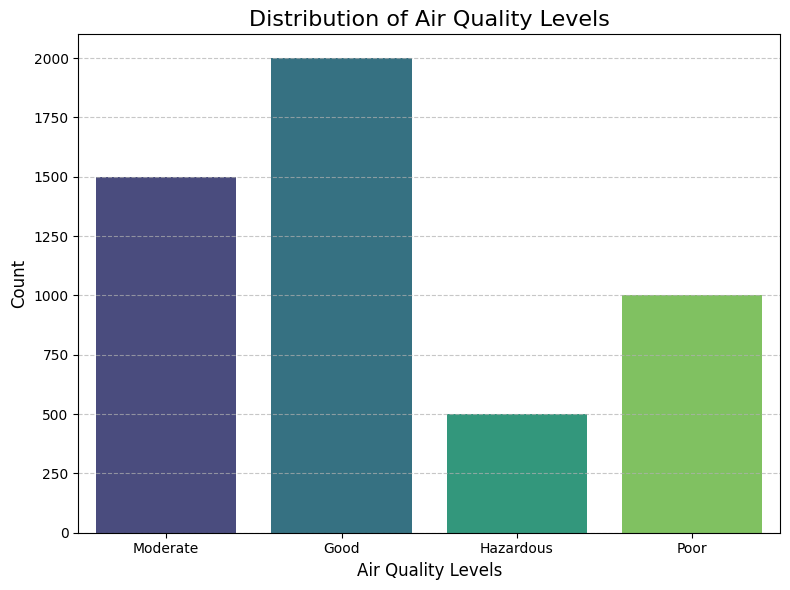

In [ ]:
# Visualise target variable (Air Quality)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Air Quality', palette='viridis')
plt.title('Distribution of Air Quality Levels', fontsize=16)
plt.xlabel('Air Quality Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Distribution of Air Quality Levels (Target Variable) :**

The data appears to be imbalanced, as the count of "Good" being 4x of "Hazardous," which could negatively impact the model's performance.

In [ ]:
# Encode categorical variables using LabelEncoder

le = LabelEncoder()

df['Air Quality']=le.fit_transform(df['Air Quality'])

df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [ ]:
# Check the mapping of original labels to encoded values

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapped:", label_mapping)

Label Mapped: {'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


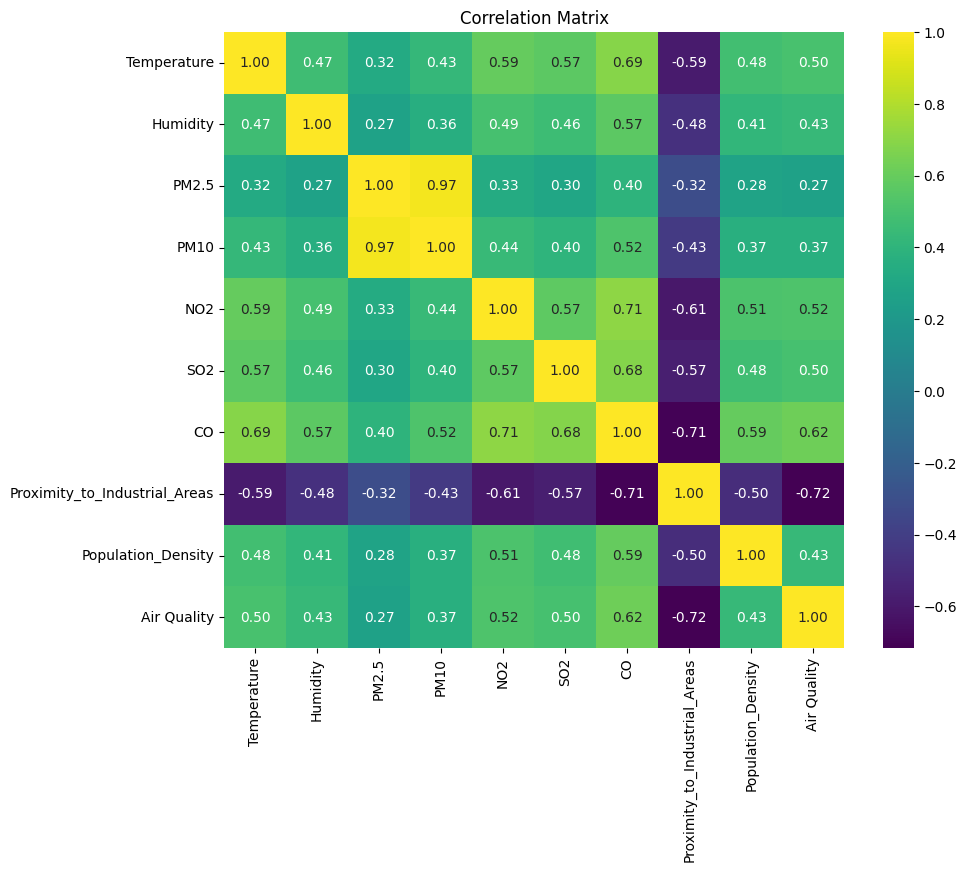

In [ ]:
# Plot correlation matrix to identify relationships between features

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Correlation Matrix Analysis:**

The correlation matrix helps in understanding the relationships between different features in the dataset. By analyzing the correlations among the features, we observe the following:

1. Air Quality is most strongly correlated with CO, suggesting that CO has a significant impact on Air Quality.

2. Proximity to industrial zones is inversely proportional to the air quality. In simpler terms, people living near industrial areas experience a decline in air quality.  



In [ ]:
# Splitting the dataset into features (X) and target (y)

X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(4000, 9)

# Model Selection

Three models are initially evaluated, using GridSearchCV for hyperparameter tuning to identify the most appropriate model with the appropriate parameters.

1. Logistic Regression
2. K Nearest Neighbors
3. Random Forest (Outperforms other models)

In [ ]:
# A dictionary of models with their corresponding hyperparameters for GridSearchCV

param_grids = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['newton-cg', 'sag', 'saga','lbfgs'],
            'max_iter': [100, 200, 500]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

In [ ]:
# Hyper-parameter tuning using GridSearchCV

best_models = {}
model_accuracies = {}

for model_name, model_info in param_grids.items():
    print(f"-- Tuning hyperparameters for {model_name}...\n")
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        scoring='accuracy',
        cv=10,   # 10-fold cross-validation
        n_jobs=-1
    )

    # train the model
    grid_search.fit(X_train, y_train)

    # save the best model parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Training Accuracy: {grid_search.best_score_}")

    # Evaluate the model on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Save test accuracy
    model_accuracies[model_name] = test_accuracy
    print(f"Test Accuracy: {test_accuracy}\n\n")

-- Tuning hyperparameters for Logistic_Regression...

Best parameters for Logistic_Regression: {'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}
Training Accuracy: 0.942
Test Accuracy: 0.943


-- Tuning hyperparameters for KNN...

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Training Accuracy: 0.8322499999999999
Test Accuracy: 0.812


-- Tuning hyperparameters for Random_Forest...

Best parameters for Random_Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9557500000000001
Test Accuracy: 0.955




**Insights**

* Random Forest Model achieved around 95% accuracy during both training and test, outperforming other models with the below parameter config :

```
'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100
```

# Performance Analysis

Since Random Forest outperformed the other models, let's further analyze Random Forest model's performance by analyzing -

1. Classification Report Analysis (Accuracy, Recall, Precision, F1 Score etc)
2. Confusion matrix Analysis
3. Feature Importance

In [ ]:
# Initialize random forest model from `best_models` dictionary
random_forest_model = best_models['Random_Forest']

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate model performance
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.91      0.86      0.88       111
           2       0.96      0.97      0.97       294
           3       0.87      0.89      0.88       186

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000



**Analysis of the Random Forest Classification Report**

1. **Overall Accuracy:** The model achieved an accuracy of 95%, indicating that it correctly predicted 95% of the test samples.

2. **Precision:** Precision measures the ability of the model to correctly identify positive predictions for each class. The report shows the model is very confident in predicting Class 0 and Class 2, but less so for Class 3.

3. **Recall:** Recall measures the model's ability to identify all relevant instances of each class. The report shows the model struggles more with identifying Class 1 and Class 3 compared to others.

4. **F1-Score:** The F1-score balances precision and recall. Class 0 and class 2 shows good performance, for class 1 and 3, there is still room for improvement, maybe because of imbalance in the dataset.

4. **Class Support:** Support represents the number of true instances for each class. The imbalance in support likely affects performance, as smaller classes (like Class 1) tend to be harder to predict accurately.

5. **Macro Average:** The macro average precision, recall, and F1-score are all around 0.93, indicating good overall performance but slightly lower consistency for smaller classes (Class 1 and 3).

6. **Weighted Average:** The weighted average values (0.95) account for class imbalance, showing strong overall performance weighted by the support for each class.

**Insights:**

* The model performs excellently on Class 0 and Class 2, with near-perfect precision and recall.

* Performance is slightly lower for Class 1 and Class 3 due to smaller support and higher false positives/negatives.

* Addressing class imbalance through techniques like oversampling, undersampling, or class weighting might further improve the performance for Class 1 and Class 3.

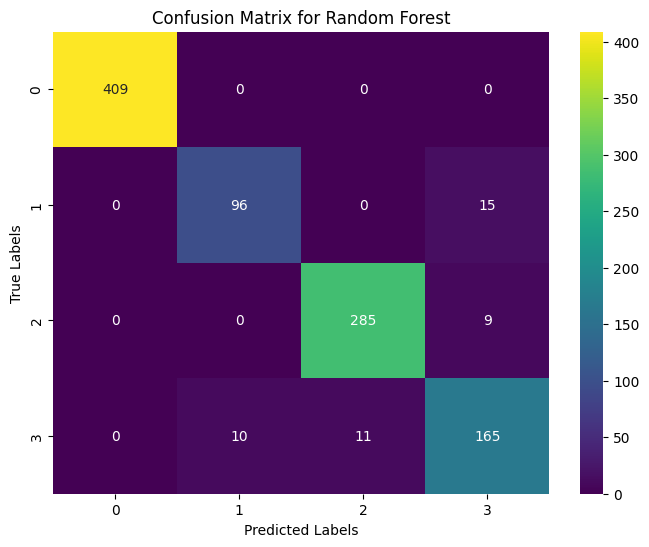

In [ ]:
# Confusion Matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='viridis', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Confusion Matrix Analysis**

* **True Positives (Diagonal Entries):** The diagonal values represent correctly classified samples.

* **False Positives (Off-Diagonal Entries in Columns):** These represent cases where the model misclassified a sample as another class.

* **False Negatives (Off-Diagonal Entries in Rows):** These represent cases where the model failed to predict the actual class.

* **True Negatives:** Everything else.


**Analysis for Each Class**

**Class 0:**

* 409 samples were correctly classified as class 0.
* No misclassifications occurred.
* The model performs perfectly for class 0.

**Class 1:**

* 96 samples were correctly classified as class 1.
* 15 samples were misclassified as class 3.
* This indicates some confusion between class 1 and class 3.

**Class 2:**

* 285 samples were correctly classified as class 2.
* 9 samples were misclassified as class 3.
* Overall, the model handles class 2 well, with minor errors.

**Class 3:**

* 165 samples were correctly classified as class 3.
* 10 samples were misclassified as class 1.
* 11 samples were misclassified as class 2.
* The model struggles slightly with class 3, confusing it with class 1 and 2.

**Insights**

1. The model perfectly classifies all class 0 samples with no errors.

2. The model misclassifies 15 class 1 samples as class 3, suggesting a need to improve differentiation between these classes.

3. Most class 2 samples are classified correctly, with only minor confusion with class 3.

4. While the majority of class 3 samples are correct, there is notable confusion with classes 1 and 2.

5. The model achieves high accuracy (95%), but there is room for improvement in distinguishing between certain classes, especially class 3.

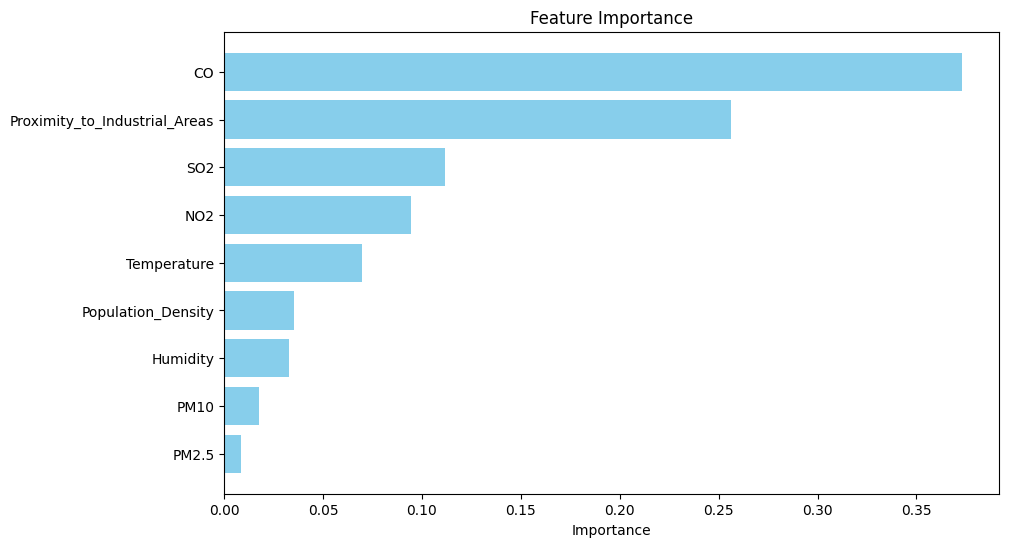

In [ ]:
# Feature importance to understand which features contributed most to the predictions

importances = random_forest_model.feature_importances_
feature_names = X_train.columns

# Sort and visualize
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center', color='skyblue')
plt.yticks(range(len(importances)), feature_names[sorted_indices])
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


# Documentation

**1. Goal:**

The objective is to **predict air quality levels** based on environmental and demographic factors that influence pollution levels.

**2. Dataset :**

The dataset used for this task ( Air Quality and Pollution Assessment) consists of 10 features and 5000 rows. It includes a mix of categorical and continuous variables, with Air Quality as the target variable and the only categorical feature.

**3. Dataset Preprocessing :**

The first step involves importing necessary libraries and loading the dataset for further processing. Then missing or duplicate values are checked to ensure data quality.

Exploratory data analysis and correlation analysis is performed to gain insights into relationships between the features. Categorical variables are encoded using label encoding to convert them into numerical values, making them suitable for machine learning models.

The dataset is split into training **(80%) and test (20%) sets** to train and evaluate the model effectively.

**4. Model Selection :**

The aim is to find the most suitable models for predicting the air quality (Classification problem), three traditional machine learning models are evaluated: Logistic Regression, K Nearest Neighbors and Random Forest. The dataset is relatively small which is why neural networks are avoided, as they tend to be computationally expensive and prone to overfitting on smaller datasets.

For model optimization, **GridSearchCV** is used, an automated hyperparameter tuning technique, with **10 fold cross validation** and **accuracy as scoring metric** to identify the best model with optimal parameters.

**5. Model Evaluation:**

Since this is a classfication task, the best model is evaluated using performance metrics like Accuracy, Precision, Recall, F1 score. Then a detailed confusion matrix analysis is done to understand the misclassifications. In the End, most contributing features to the predictions are shown.

Among the models tested, **Random Forest outperformed** the other models, achieving the **highest Accuracy (95%)**. Logistic Regression (94%) performed comparably well, followed by K Nearest Neighbors (81%).

**6. Performance Insights :**

Out of the three models, the Random Forest model demonstrated strong predictive capability, achieving an an accuracy of 95%, which indicates that it correctly predicted 95% of the test samples.

- **Accuracy: 95%**
- **Precision (Macro Average): 94%**
- **Recall (Macro Average): 93%**
- **F1-Score (Macro Average): 93%**

Insights from Confusion Matrix -

- **Perfect Classification for Class 0:** The model performs perfectly for class 0, with no false positives or false negatives.

- **Confusion Between Class 1 and Class 3:** The model struggles to distinguish between classes 1 and 3, with several samples being misclassified.

- **Class 2 is Predominantly Accurate:** Most samples of class 2 were classified correctly, though there is minor confusion with class 3.

Lastly the features which contributed most to the predictions is shown, such as -

- **CO (Carbon Monoxide):** It has significant influence on pollution levels.

- **Proximity to industrial zones:** It shows areas closer to industries tend to have poorer air quality (inversely proportional to Air Quality)

**7. Key Challenges :**

Since the dataset is mostly cleaned, no significant challenges were encountered during data preprocessing. However, Tuning hyperparameters to select the most suitable model and achieve optimal results posed a challenge.

**8. Potential Areas for Improvement :**

1. **Dataset size:** Increasing the dataset size often improves model performance, since this is a very small dataset.

2. **Class Imbalance:** Since there is class imbalance in the target variable (Air Quality) with class 1 and 3, using sampling techniques like oversampling, undersampling, or class weighting to balance the data might increase accuracy.

2. **Model Tuning:** Further optimization and fine-tuning of the model could potentially lead to even better results.